<a href="https://colab.research.google.com/github/GimenesPaula/GimenesPaula/blob/main/Processamento_de_Imagem_Mecha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dominant Color
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from collections import Counter
import pprint

In [ ]:
#Image Difference with OpenCV and Python
# import the necessary packages
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing import image

In [ ]:
#Importa arquivo a ser tratado
from google.colab import files
uploaded = files.upload()

Saving 01.jpg to 01.jpg
Saving 02.jpg to 02.jpg
Saving 03.jpg to 03.jpg
Saving 04.jpg to 04.jpg
Saving 05.jpg to 05.jpg
Saving 06.jpg to 06.jpg
Saving 07.jpg to 07.jpg
Saving 08.jpg to 08.jpg
Saving 09.jpg to 09.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 042.jpg to 042.jpg


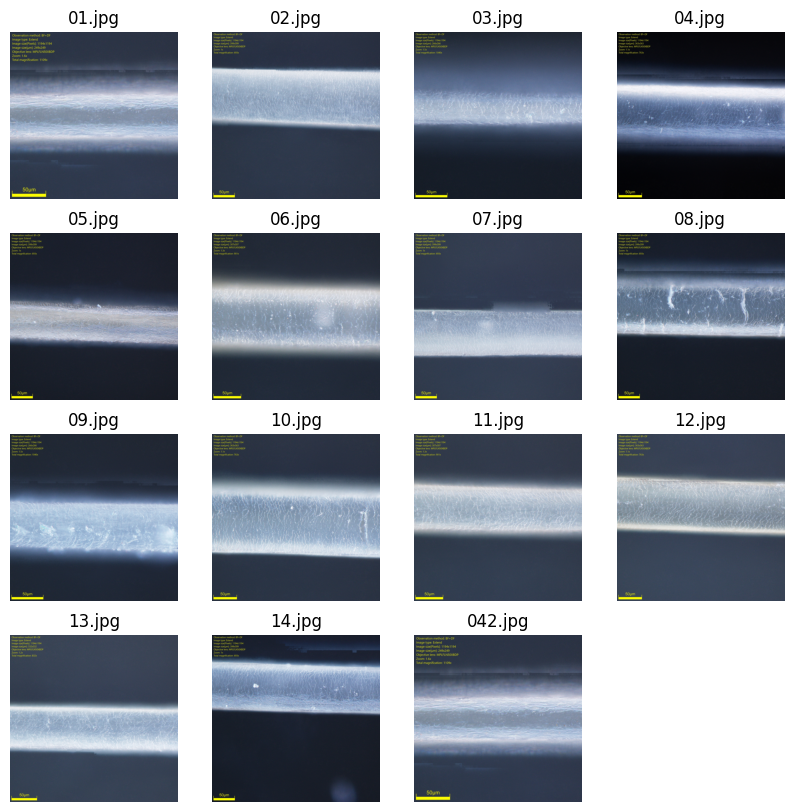

In [ ]:
#exibe imagens Original
fig = plt.figure(figsize=(10,10)) #Tamanho da imagem a ser exibida
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  plt.subplot(4,4,num+1)    # linhas e colunas para exibir imagens
  plt.axis('off')
  plt.title(fn)
  plt.imshow(img)
  #plt.savefig('originais.jpg')

In [ ]:
#FUnção para Remoção de ruido: enfatizar bordas
def filtro(img):
  imBlur = cv2.blur(img,(1,1))   # Aplicar filtro galsiano de tamanho nxn. Quanto menor, mais definição
  f = np.fft.fft2(imBlur) # Transforma a imagem para o dominio de frequencia
  fshift = np.fft.fftshift(f) # Centraliza os componentes na frequencia zero
  rows, cols = imBlur.shape #tamanho da imagem
  crow,ccol = round(rows/2) , round(cols/2)
  fshift[crow-1:crow+1, ccol-1:ccol+1] = 0   # Remove intervalo. Quanto menor intervalo, maior a definição das bordas
  f_ishift = np.fft.ifftshift(fshift) #reverte centralização
  img_back = np.fft.ifft2(f_ishift) #inversa da transformada
  img_back = np.abs(img_back)
  return img_back

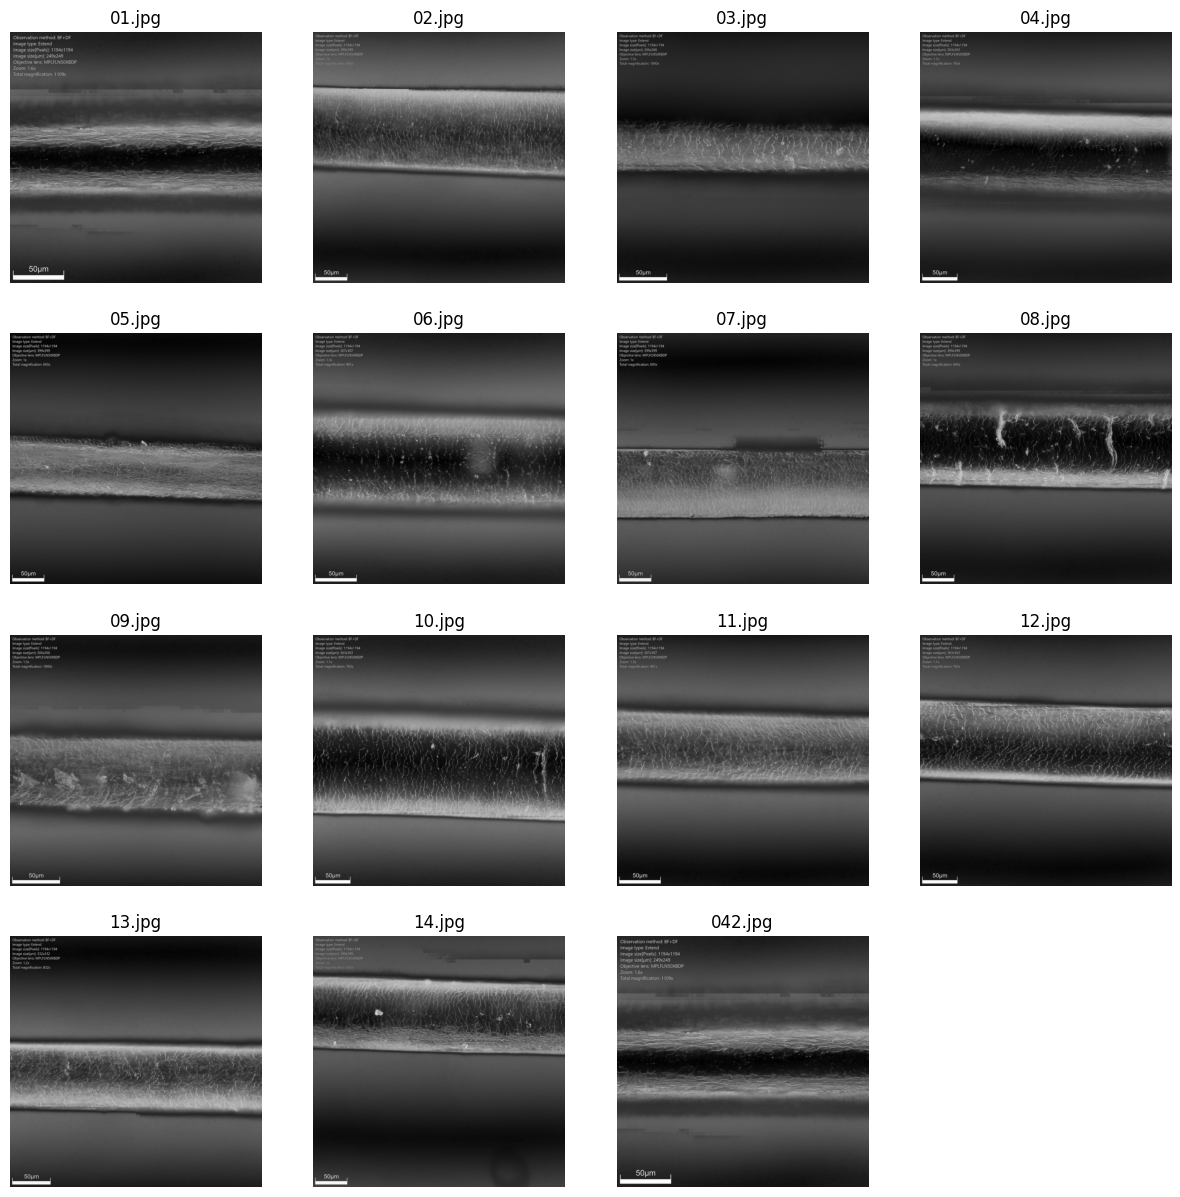

In [ ]:
# Imagens transformadas por fourier filtro galsiano
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
  plt.subplot(4,4,num+1) #linhas,colunas do gráfico
  img2=filtro(img)
  plt.axis('off')
  plt.title(fn)
  plt.imshow(img2, cmap = 'gray')
  #plt.savefig('filtrada.jpg')

In [ ]:
import matplotlib.mlab as ml

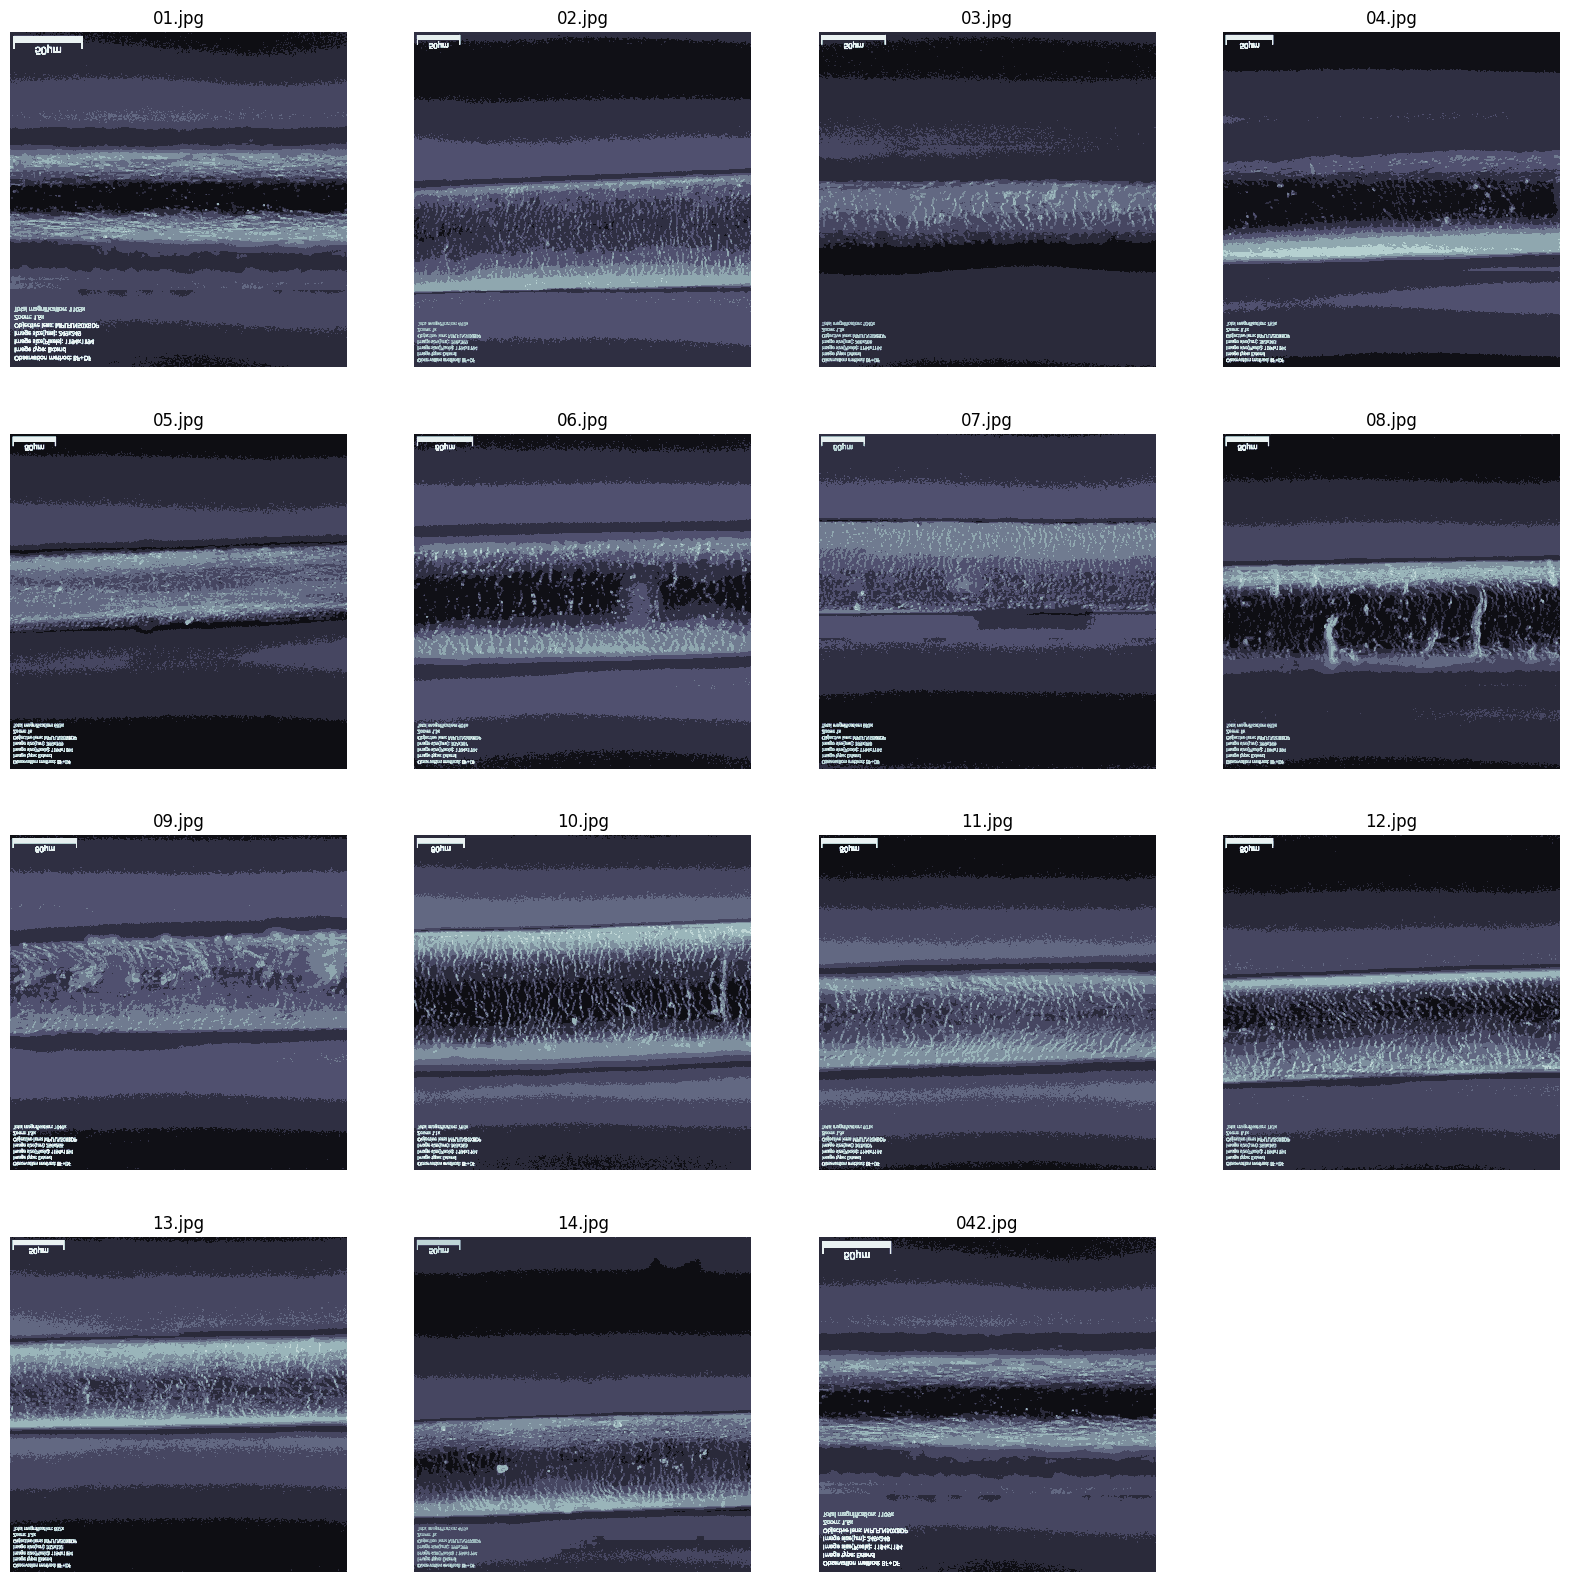

In [ ]:
# Análise de contornos por transformada de fourier filtro galsiano
fig = plt.figure(figsize=(20,20))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
  plt.subplot(4,4,num+1) #linhas,colunas do gráfico
  img2=filtro(img)
  plt.axis('off')
  plt.title(fn)
  plt.contourf(img2, cmap=plt.cm.bone,origin='lower')
  #plt.savefig('contorno.jpg')

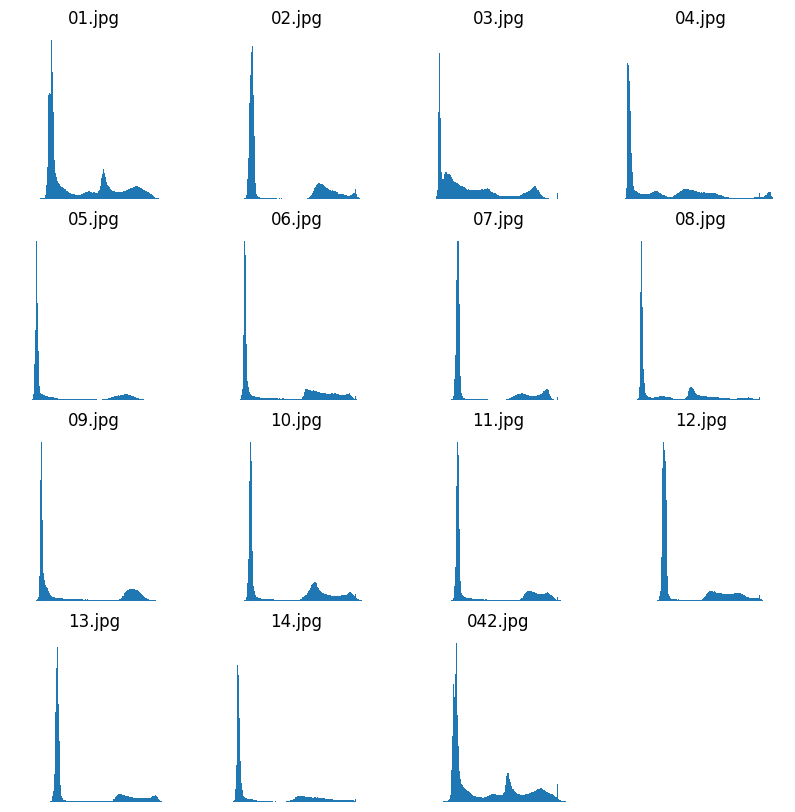

In [ ]:
#Imagens em cinza / Histograma
fig = plt.figure(figsize=(10,10))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) #preto e Branco
  plt.subplot(4,4,num+1),plt.hist(img.ravel(),bins = 256, range = [0,256])    #images na grade
  plt.axis('off')
  plt.title(fn)

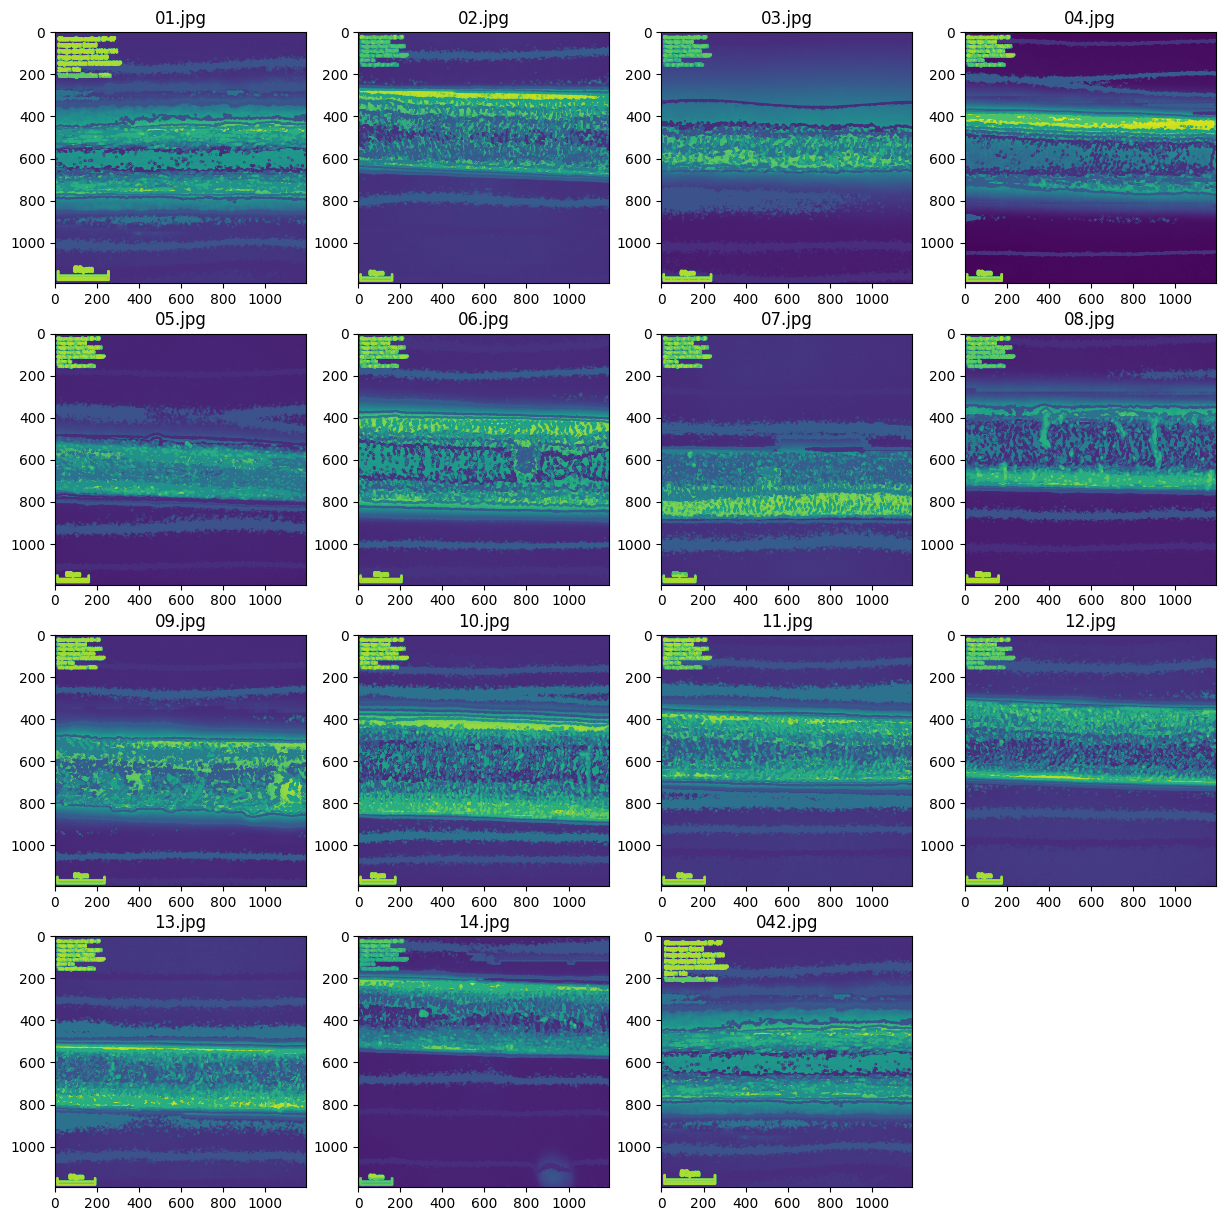

In [ ]:
#Imagens em cinza / Contorno
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) #preto e Branco
  img2 = filtro(img)
  plt.subplot(4,4,num+1),plt.contour(img2),plt.imshow(img)  #sobrepoe imagem e contorno no formato de grid
  #plt.axis('off')
  plt.title(fn)

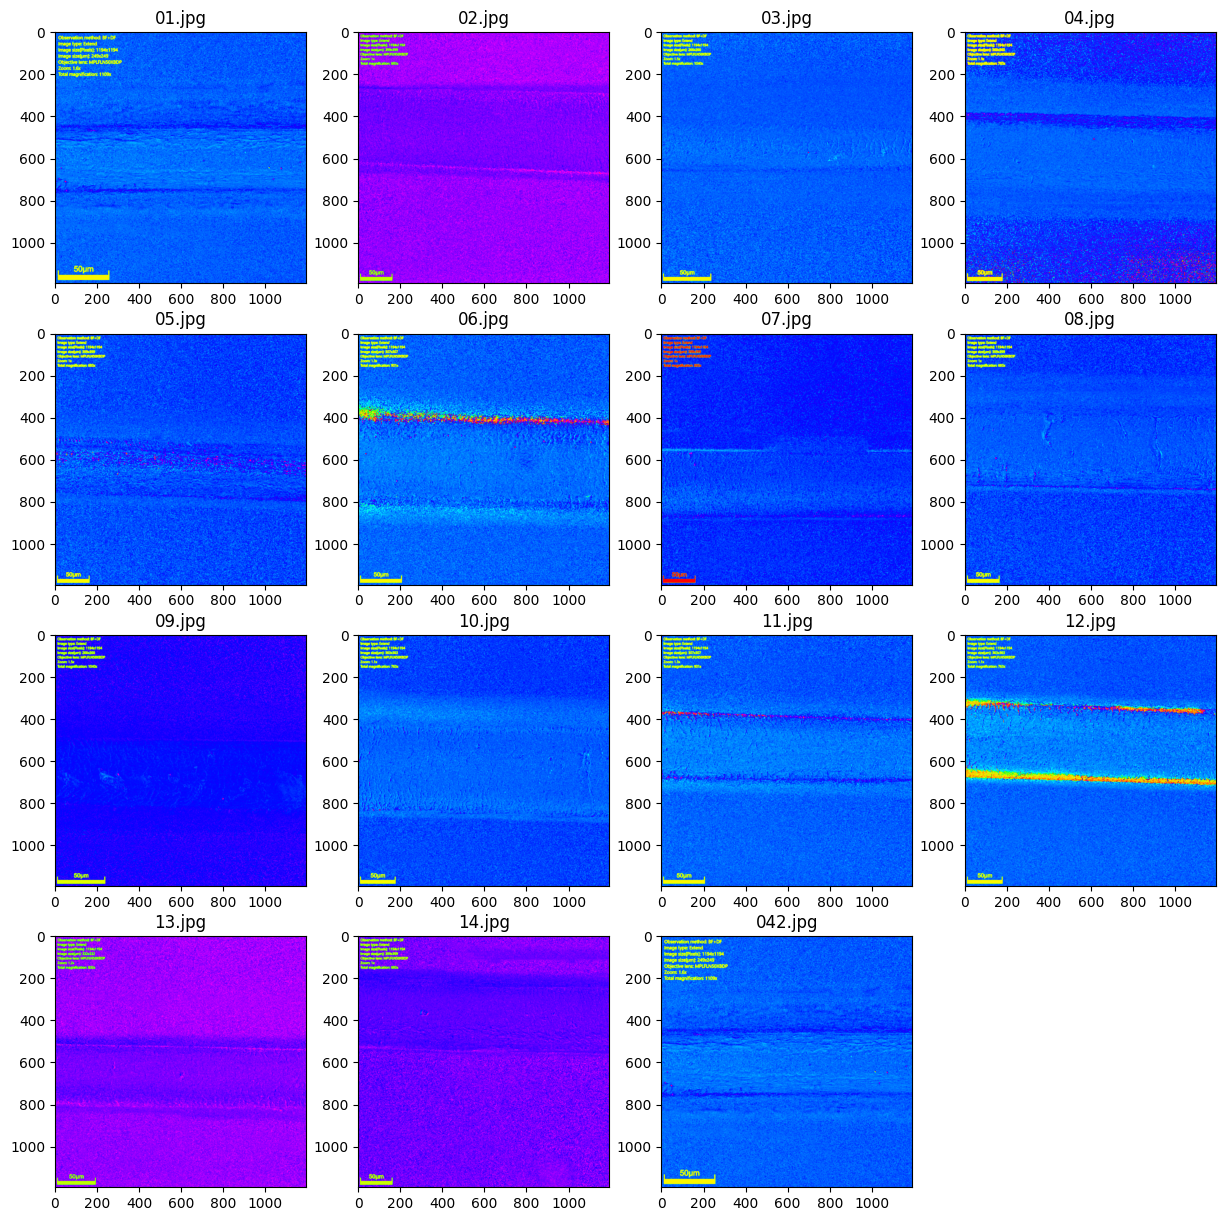

In [ ]:
#Imagens em Huve
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #preto e Branco
  plt.subplot(4,4,num+1)
  #plt.axis('off')
  plt.title(fn)
  plt.imshow(img[:,:,0], cmap = 'hsv')

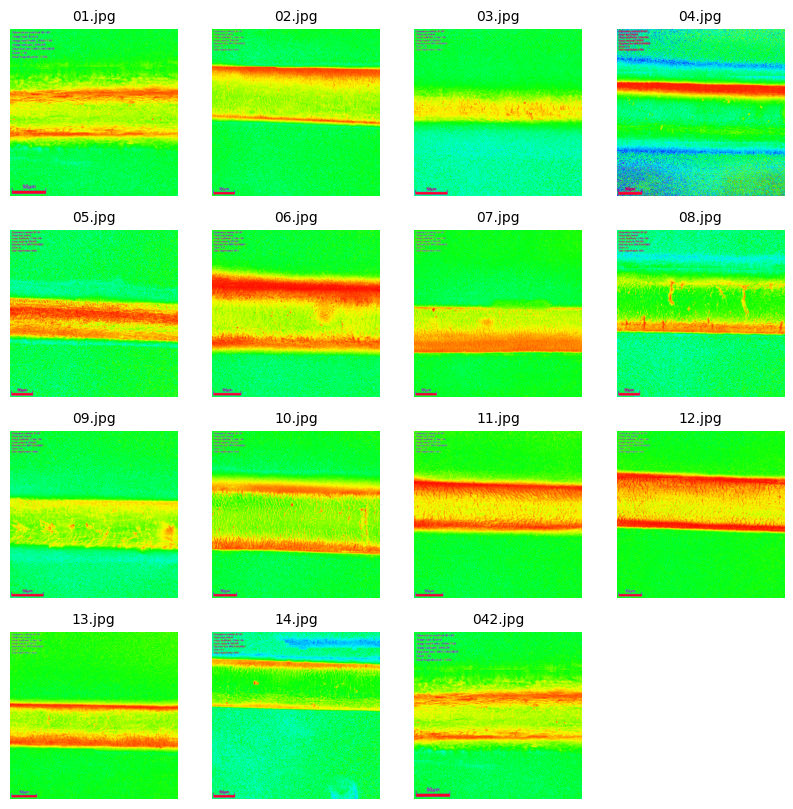

In [ ]:
#Imagens em Saturation
fig = plt.figure(figsize=(10,10))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #HSV
  plt.subplot(4,4,num+1),plt.imshow(img[:,:,1], cmap = 'hsv')
  plt.axis('off')
  plt.title(fn,fontsize=10)


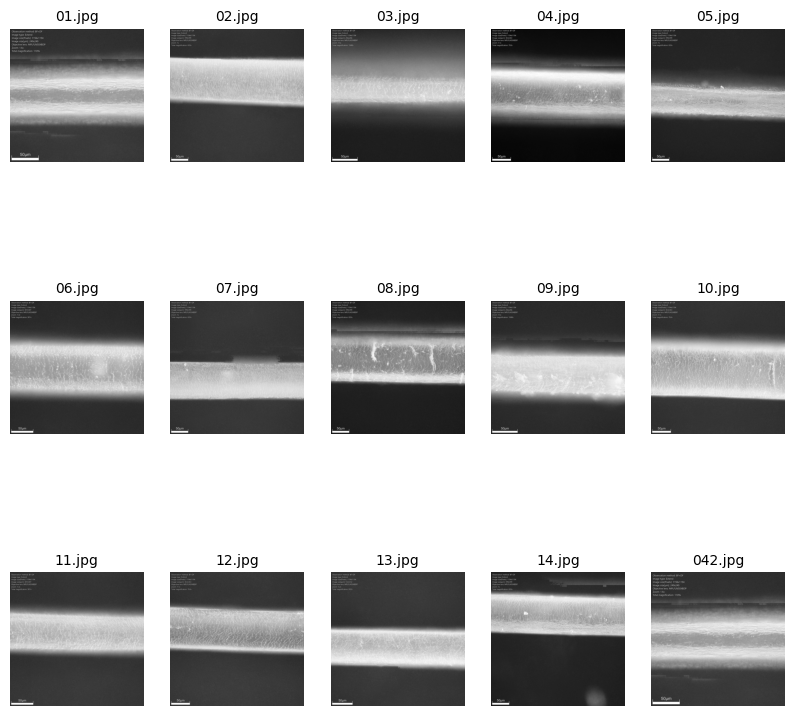

In [ ]:
#Compara em Valor
fig = plt.figure(figsize=(10,10))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV)
  plt.subplot(3,5,num+1)
  plt.axis('off')
  plt.title(fn, fontsize=10)
  plt.imshow(img[:,:,2], cmap = 'gray')

TypeError: Image data of dtype complex128 cannot be converted to float

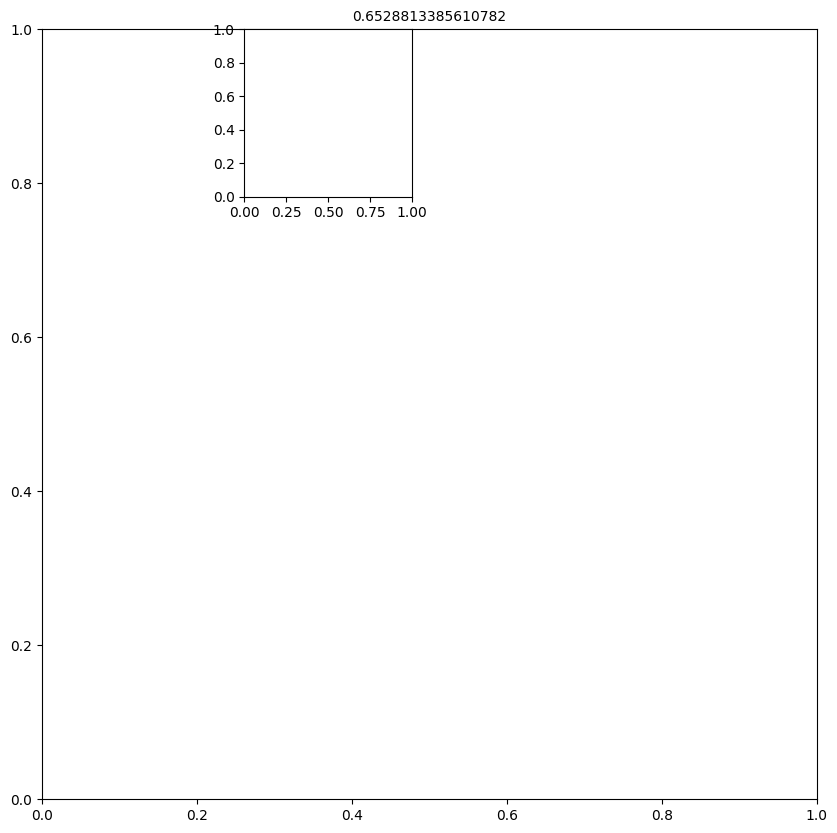

In [ ]:
#Calcula Score de diff
fig = plt.figure(figsize=(10,10))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  if num == 0:
    antes = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) #defina se BGR2GRAY - cinza, transformada, ou BGR2HSV - HSV
  else:
    depois = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    (score, diff) = compare_ssim(depois, antes, full=True)
#   (score, diff) = compare_ssim(fshiftd, fshifta, full=True) # Compara as transformadas
#    (score, diff) = compare_ssim(depois[:,:,0], antes[:,:,0], full=True) para HSV, comparando 0 = H; 1 = S; 2 = V
    diff = (diff * 255).astype("uint8")
    plt.title("{}".format(score, width=6), fontsize=10)
    plt.subplot(4,4,num+1), plt.imshow(depois2, cmap = 'gray')